FEATURE EXTRACTION EXAMPLE

This notebook contains an example of how to extract Mel-frequency cepstral coefficient (MFCC) features from the sound data in the dataset.
This example uses parameters similar to those define in the paper: Salamon J, Jacoby C, Bello JP. A dataset and taxonomy for urban sound research. In Proceedings of the 22nd ACM international conference on Multimedia 2014 Nov 3 (pp. 1041-1044).

This example peforms the following steps:
- Resample the sound recording to a target sampling rate of 44,100 kHz
- Zero-pad the sound recording to a duration of 4 seconds
- Compute the MFCCs

The following example is highly NOT optimized and it may serve just as a starting point for your solution.
You are strongly encouraged to consider different paramters and approaches to pre-process the data.

In [3]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

Finds all .wav flies in fold1

In [4]:
_wav_dir_="./UrbanSound8K/audio/fold1/"
files = librosa.util.find_files(_wav_dir_)

Parameters

In [8]:
# resampling freq
target_sr =44100

# MFCC parameters
n_mfcc=40
hop_length=round(target_sr*0.0125)
win_length=round(target_sr*0.023)
n_fft=2**14
mfcc_time_size = 4*target_sr//hop_length+1

# read all wav file without resampling
dataset=np.zeros(shape=[len(files),4*target_sr])
dataset_mfcc=np.zeros(shape=[len(files),n_mfcc,mfcc_time_size])

Main loop. It might last few minutes

In [9]:
i=0
for f in files:
    (sig, rate) = librosa.load(f, sr=None)
    sig_res =librosa.resample(sig, orig_sr=rate, target_sr=target_sr)
    # zero padding
    if len(sig_res)<4*target_sr:
        sig_res_pad = np.concatenate((sig_res, np.zeros(4*target_sr-len(sig_res))),axis=0)
    else:
        sig_res_pad=sig_res
    dataset[i]=sig_res_pad
    # computes the MFCCs
    sig_mfcc =librosa.feature.mfcc(y=sig_res_pad,sr=target_sr,n_fft=n_fft,hop_length=hop_length,win_length=win_length,n_mfcc=n_mfcc)
    dataset_mfcc[i]=sig_mfcc
    i+=1

Visualization of an example

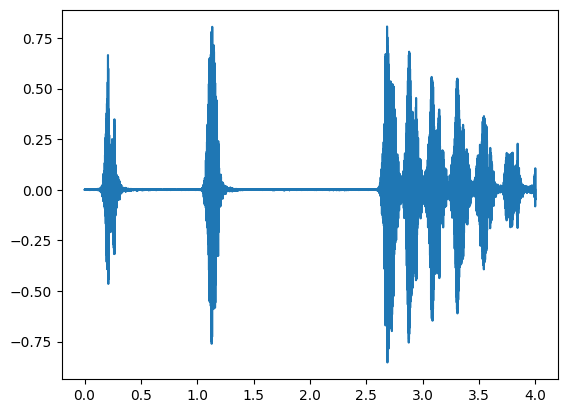

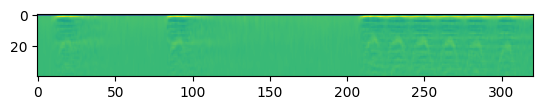

In [10]:
index=0
plt.figure()
plt.plot(np.asarray(list(range(4*target_sr)))/target_sr,dataset[index])
plt.show()

plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()
